In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

Variable	Definition	Comment
	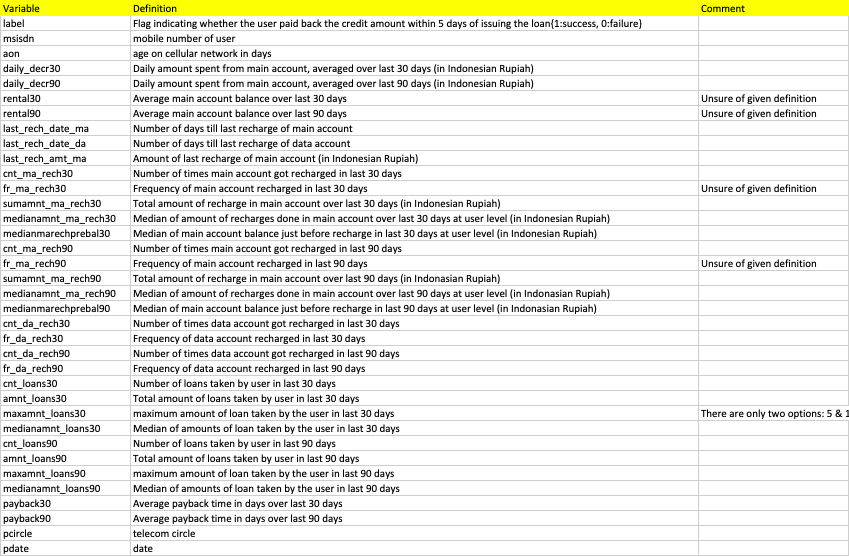

In [35]:
filename = "MicroCredit.csv"
df = pd.read_csv(filename, sep='\t',index_col=0)
df.head(5)

label       msisdn    aon  daily_decr30  daily_decr90  rental30  rental90  \
1      0  21408I70789  272.0   3055.050000   3065.150000    220.13    260.13   
2      1  76462I70374  712.0  12122.000000  12124.750000   3691.26   3691.26   
3      1  17943I70372  535.0   1398.000000   1398.000000    900.13    900.13   
4      1  55773I70781  241.0     21.228000     21.228000    159.42    159.42   
5      1  03813I82730  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  \
1                2.0                0.0              1539  ...   
2               20.0                0.0              5787  ...   
3                3.0                0.0              1539  ...   
4               41.0                0.0               947  ...   
5                4.0                0.0              2309  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
1              6.0                 0.0          2.0            12   
2             12.0                 0.0          1.0            12   
3              6.0                 0.0          1.0             6   
4              6.0                 0.0          2.0            12   
5              6.0                 0.0          7.0            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
1                6                 0.0  29.000000  29.000000      UPW   
2               12                 0.0   0.000000   0.000000      UPW   
3                6                 0.0   0.000000   0.000000      UPW   
4                6                 0.0   0.000000   0.000000      UPW   
5                6                 0.0   2.333333   2.333333      UPW   

        pdate  
1  20/07/2016  
2  10/08/2016  
3  19/08/2016  
4  06/06/2016  
5  22/06/2016  

[5 rows x 36 columns]

# EDA

In [3]:
df.shape  # checking the rows and cols count

(209593, 36)

In [4]:
df.columns # checking the various cols

Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [5]:
df.dtypes # checking the datatypes of cols

label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianam

In [6]:
df.describe()

label            aon   daily_decr30   daily_decr90  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean        0.875177    8112.343445    5381.402289    6082.515068   
std         0.330519   75696.082531    9220.623400   10918.812767   
min         0.000000     -48.000000     -93.012667     -93.012667   
25%         1.000000     246.000000      42.440000      42.692000   
50%         1.000000     527.000000    1469.175667    1500.000000   
75%         1.000000     982.000000    7244.000000    7802.790000   
max         1.000000  999860.755200  265926.000000  320630.000000   

            rental30       rental90  last_rech_date_ma  last_rech_date_da  \
count  209593.000000  209593.000000       209593.00000      209593.000000   
mean     2692.581910    3483.406534         3755.84780        3712.202921   
std      4308.586781    5770.461279        53905.89223       53374.833430   
min    -23737.140000  -24720.580000          -29.00000         -29.000000   
25%       280.420000     300.260000            1.00000           0.000000   
50%      1083.570000    1334.000000            3.00000           0.000000   
75%      3356.940000    4201.790000            7.00000           0.000000   
max    198926.110000  200148.110000       998650.37770      999171.809400   

       last_rech_amt_ma  cnt_ma_rech30  ...    cnt_loans30   amnt_loans30  \
count     209593.000000  209593.000000  ...  209593.000000  209593.000000   
mean        2064.452797       3.978057  ...       2.758981      17.952021   
std         2370.786034       4.256090  ...       2.554502      17.379741   
min            0.000000       0.000000  ...       0.000000       0.000000   
25%          770.000000       1.000000  ...       1.000000       6.000000   
50%         1539.000000       3.000000  ...       2.000000      12.000000   
75%         2309.000000       5.000000  ...       4.000000      24.000000   
max        55000.000000     203.000000  ...      50.000000     306.000000   

       maxamnt_loans30  medianamnt_loans30    cnt_loans90   amnt_loans90  \
count    209593.000000       209593.000000  209593.000000  209593.000000   
mean        274.658747            0.054029      18.520919      23.645398   
std        4245.264648            0.218039     224.797423      26.469861   
min           0.000000            0.000000       0.000000       0.000000   
25%           6.000000            0.000000       1.000000       6.000000   
50%           6.000000            0.000000       2.000000      12.000000   
75%           6.000000            0.000000       5.000000      30.000000   
max       99864.560860            3.000000    4997.517944     438.000000   

       maxamnt_loans90  medianamnt_loans90      payback30      payback90  
count    209593.000000       209593.000000  209593.000000  209593.000000  
mean          6.703134            0.046077       3.398826       4.321485  
std           2.103864            0.200692       8.813729      10.308108  
min           0.000000            0.000000       0.000000       0.000000  
25%           6.000000            0.000000       0.000000       0.000000  
50%           6.000000            0.000000       0.000000       1.666667  
75%           6.000000            0.000000       3.750000       4.500000  
max          12.000000            3.000000     171.500000     171.500000  

[8 rows x 33 columns]

Key Observations here

1. Mean and median in most of features are having huge diference.
2.  Also , there is huge difference in 75% and max values in most of the features. 
Few Outliers may exist

In [7]:
# checking the information about the not-null, datatypes, rows and cols count of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209593 entries, 1 to 209593
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

In [8]:
df.isnull() # checking for any null values

label  msisdn    aon  daily_decr30  daily_decr90  rental30  rental90  \
1       False   False  False         False         False     False     False   
2       False   False  False         False         False     False     False   
3       False   False  False         False         False     False     False   
4       False   False  False         False         False     False     False   
5       False   False  False         False         False     False     False   
...       ...     ...    ...           ...           ...       ...       ...   
209589  False   False  False         False         False     False     False   
209590  False   False  False         False         False     False     False   
209591  False   False  False         False         False     False     False   
209592  False   False  False         False         False     False     False   
209593  False   False  False         False         False     False     False   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  \
1                   False              False             False  ...   
2                   False              False             False  ...   
3                   False              False             False  ...   
4                   False              False             False  ...   
5                   False              False             False  ...   
...                   ...                ...               ...  ...   
209589              False              False             False  ...   
209590              False              False             False  ...   
209591              False              False             False  ...   
209592              False              False             False  ...   
209593              False              False             False  ...   

        maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
1                 False               False        False         False   
2                 False               False        False         False   
3                 False               False        False         False   
4                 False               False        False         False   
5                 False               False        False         False   
...                 ...                 ...          ...           ...   
209589            False               False        False         False   
209590            False               False        False         False   
209591            False               False        False         False   
209592            False               False        False         False   
209593            False               False        False         False   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
1                 False               False      False      False    False   
2                 False               False      False      False    False   
3                 False               False      False      False    False   
4                 False               False      False      False    False   
5                 False               False      False      False    False   
...                 ...                 ...        ...        ...      ...   
209589            False               False      False      False    False   
209590            False               False      False      False    False   
209591            False               False      False      False    False   
209592            False               False      False      False    False   
209593            False               False      False      False    False   

        pdate  
1       False  
2       False  
3       False  
4       False  
5       False  
...       ...  
209589  False  
209590  False  
209591  False  
209592  False  
209593  False  

[209593 rows x 36 columns]

In [9]:
df.isnull().sum() # null  values column wise counts

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

<AxesSubplot:>

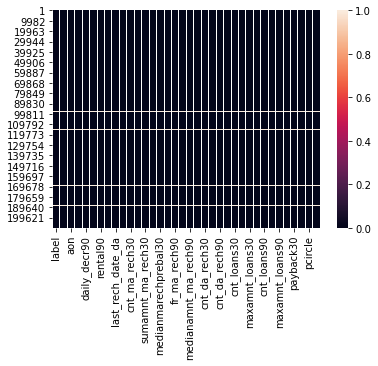

In [25]:
sns.heatmap(df.isnull())

heatmap shows there are no null values in the data

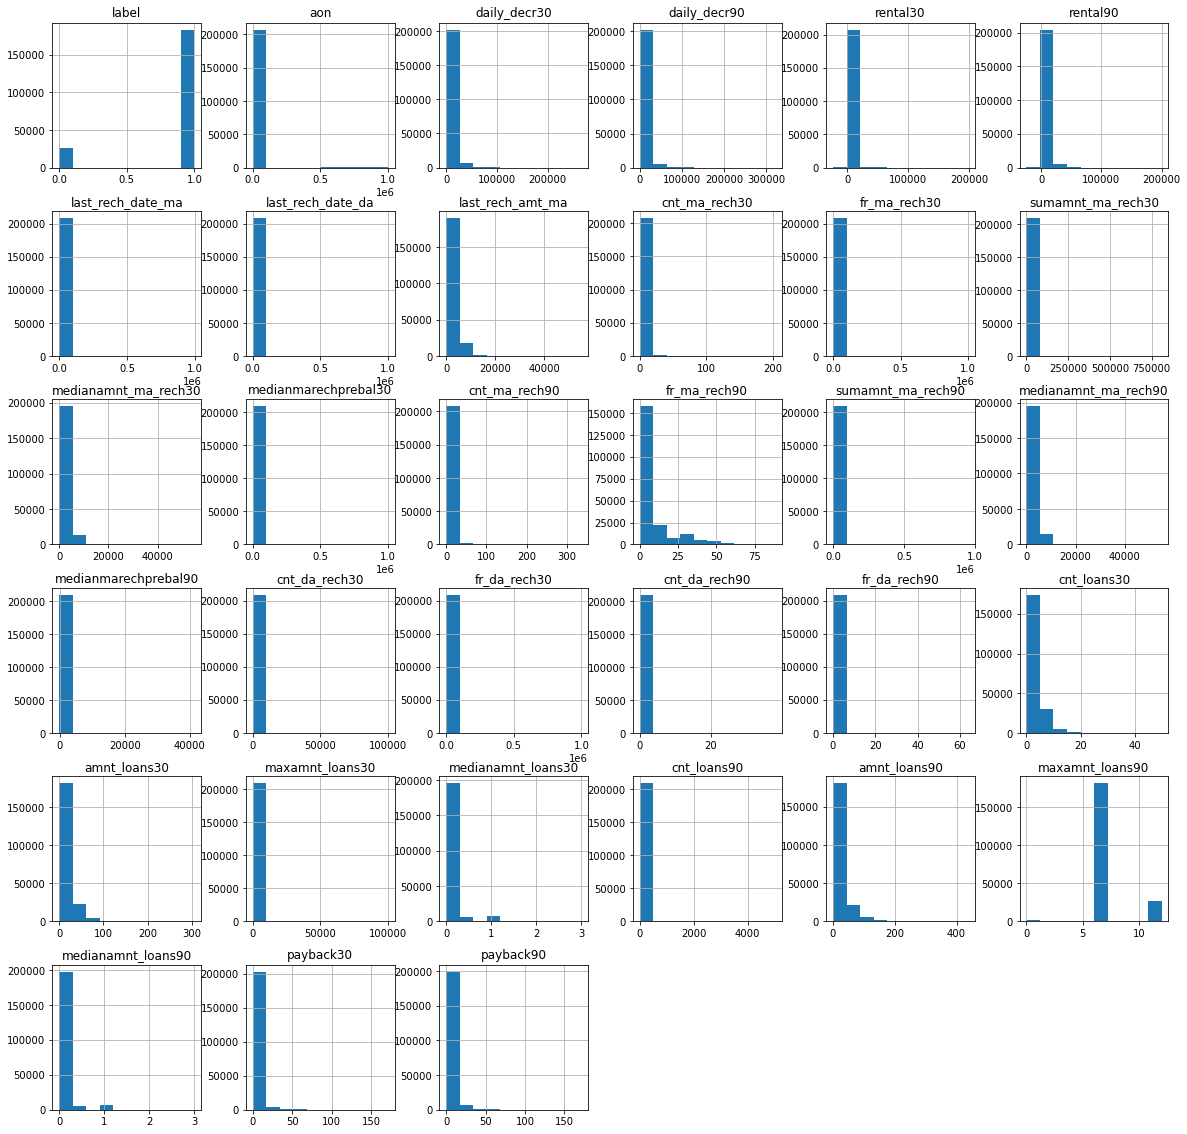

In [11]:
df.hist(figsize=(20,20))
plt.show()

In [12]:
df_cor=df.corr()
df_cor

label       aon  daily_decr30  daily_decr90  \
label                 1.000000 -0.003785      0.168298      0.166150   
aon                  -0.003785  1.000000      0.001104      0.000374   
daily_decr30          0.168298  0.001104      1.000000      0.977704   
daily_decr90          0.166150  0.000374      0.977704      1.000000   
rental30              0.058085 -0.000960      0.442066      0.434685   
rental90              0.075521 -0.000790      0.458977      0.471730   
last_rech_date_ma     0.003728  0.001692      0.000487      0.000908   
last_rech_date_da     0.001711 -0.001693     -0.001636     -0.001886   
last_rech_amt_ma      0.131804  0.004256      0.275837      0.264131   
cnt_ma_rech30         0.237331 -0.003148      0.451385      0.426707   
fr_ma_rech30          0.001330 -0.001163     -0.000577     -0.000343   
sumamnt_ma_rech30     0.202828  0.000707      0.636536      0.603886   
medianamnt_ma_rech30  0.141490  0.004306      0.295356      0.282960   
medianmarechprebal30 -0.004829  0.003930     -0.001153     -0.000746   
cnt_ma_rech90         0.236392 -0.002725      0.587338      0.593069   
fr_ma_rech90          0.084385  0.004401     -0.078299     -0.079530   
sumamnt_ma_rech90     0.205793  0.001011      0.762981      0.768817   
medianamnt_ma_rech90  0.120855  0.004909      0.257847      0.250518   
medianmarechprebal90  0.039300 -0.000859      0.037495      0.036382   
cnt_da_rech30         0.003827  0.001564      0.000700      0.000661   
fr_da_rech30         -0.000027  0.000892     -0.001499     -0.001570   
cnt_da_rech90         0.002999  0.001121      0.038814      0.031155   
fr_da_rech90         -0.005418  0.005395      0.020673      0.016437   
cnt_loans30           0.196283 -0.001826      0.366116      0.340387   
amnt_loans30          0.197272 -0.001726      0.471492      0.447869   
maxamnt_loans30       0.000248 -0.002764     -0.000028      0.000025   
medianamnt_loans30    0.044589  0.004664     -0.011610     -0.005591   
cnt_loans90           0.004733 -0.000611      0.008962      0.009446   
amnt_loans90          0.199788 -0.002319      0.563496      0.567204   
maxamnt_loans90       0.084144 -0.001191      0.400199      0.397251   
medianamnt_loans90    0.035747  0.002771     -0.037305     -0.034686   
payback30             0.048336  0.001940      0.026915      0.019400   
payback90             0.049183  0.002203      0.047175      0.040800   

                      rental30  rental90  last_rech_date_ma  \
label                 0.058085  0.075521           0.003728   
aon                  -0.000960 -0.000790           0.001692   
daily_decr30          0.442066  0.458977           0.000487   
daily_decr90          0.434685  0.471730           0.000908   
rental30              1.000000  0.955237          -0.001095   
rental90              0.955237  1.000000          -0.001688   
last_rech_date_ma    -0.001095 -0.001688           1.000000   
last_rech_date_da     0.003261  0.002794           0.001790   
last_rech_amt_ma      0.127271  0.121416          -0.000147   
cnt_ma_rech30         0.233343  0.230260           0.004311   
fr_ma_rech30         -0.001219 -0.000503          -0.001629   
sumamnt_ma_rech30     0.272649  0.259709           0.002105   
medianamnt_ma_rech30  0.129853  0.120242          -0.001358   
medianmarechprebal30 -0.001415 -0.001237           0.004071   
cnt_ma_rech90         0.312118  0.345293           0.004263   
fr_ma_rech90         -0.033530 -0.036524           0.001414   
sumamnt_ma_rech90     0.342306  0.360601           0.002243   
medianamnt_ma_rech90  0.110356  0.103151          -0.000726   
medianmarechprebal90  0.027170  0.029547          -0.001086   
cnt_da_rech30        -0.001105 -0.000548          -0.003467   
fr_da_rech30         -0.002558 -0.002345          -0.003626   
cnt_da_rech90         0.072255  0.056282          -0.003538   
fr_da_rech90          0.046761  0.036886          -0.002395   
cnt_loans30           0.180203  0.171595           0.001193   
a

<AxesSubplot:>

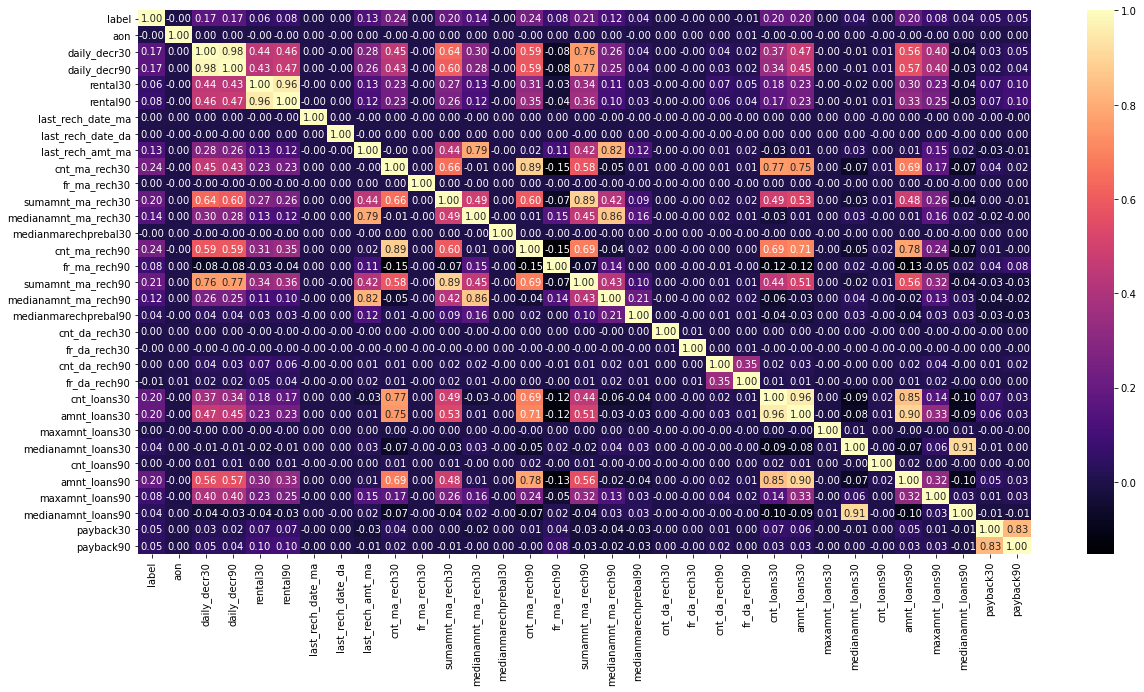

In [14]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap="magma",fmt='.2f')

Key Observations here:
1. cnt_ma_rech30 is positively correlated with daily_decr30,daily_decr90,sumamt_ma_rech30,cnt_loans30,amnt_loans30,amnt_loans90 
2. amnt_loans90,amnt_loans30,cnt_loans30 and many other variables are negatively correlated with fr_ma_rech90
3. amnt_loans90 is positively correlated with daily_decr30 and daily_decr90, cnt_ma_rech30,cnt_ma_rech90,cnt_loans30,cnt_loans90

In [13]:
# changing column with dates into datetime type
df["pdate"] = pd.to_datetime(df["pdate"], errors = "coerce") 

# Data Visualization

Univariate Analysis

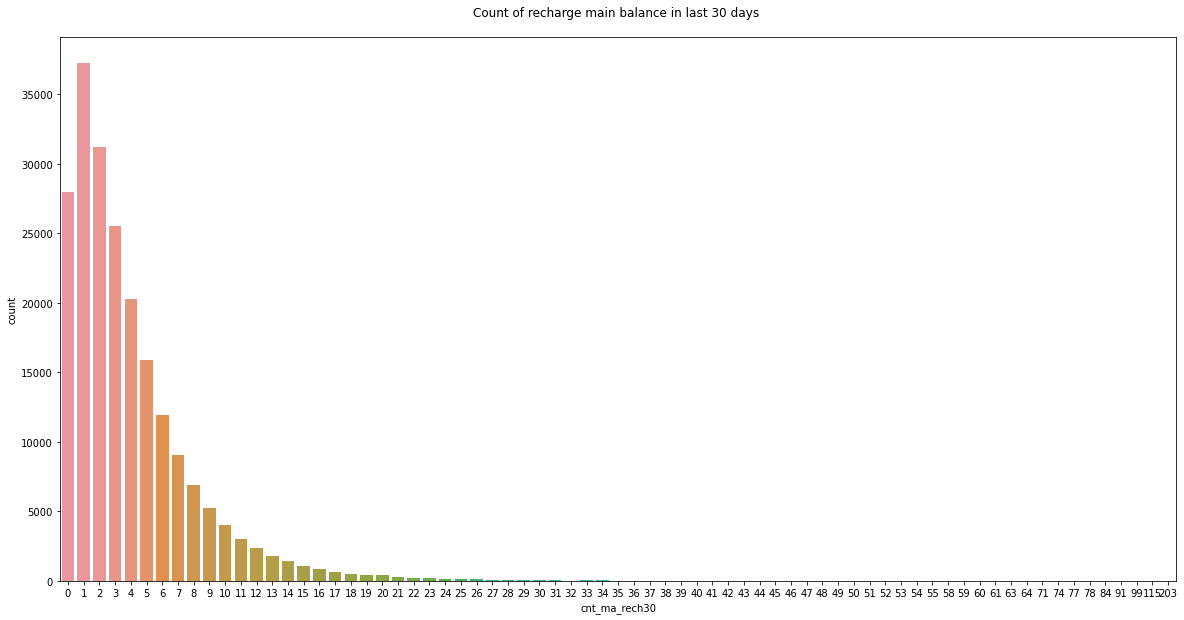

In [16]:
plt.figure(figsize=(20,10))
sns.countplot(df["cnt_ma_rech30"])
plt.title("Count of recharge main balance in last 30 days \n ")
plt.show() 

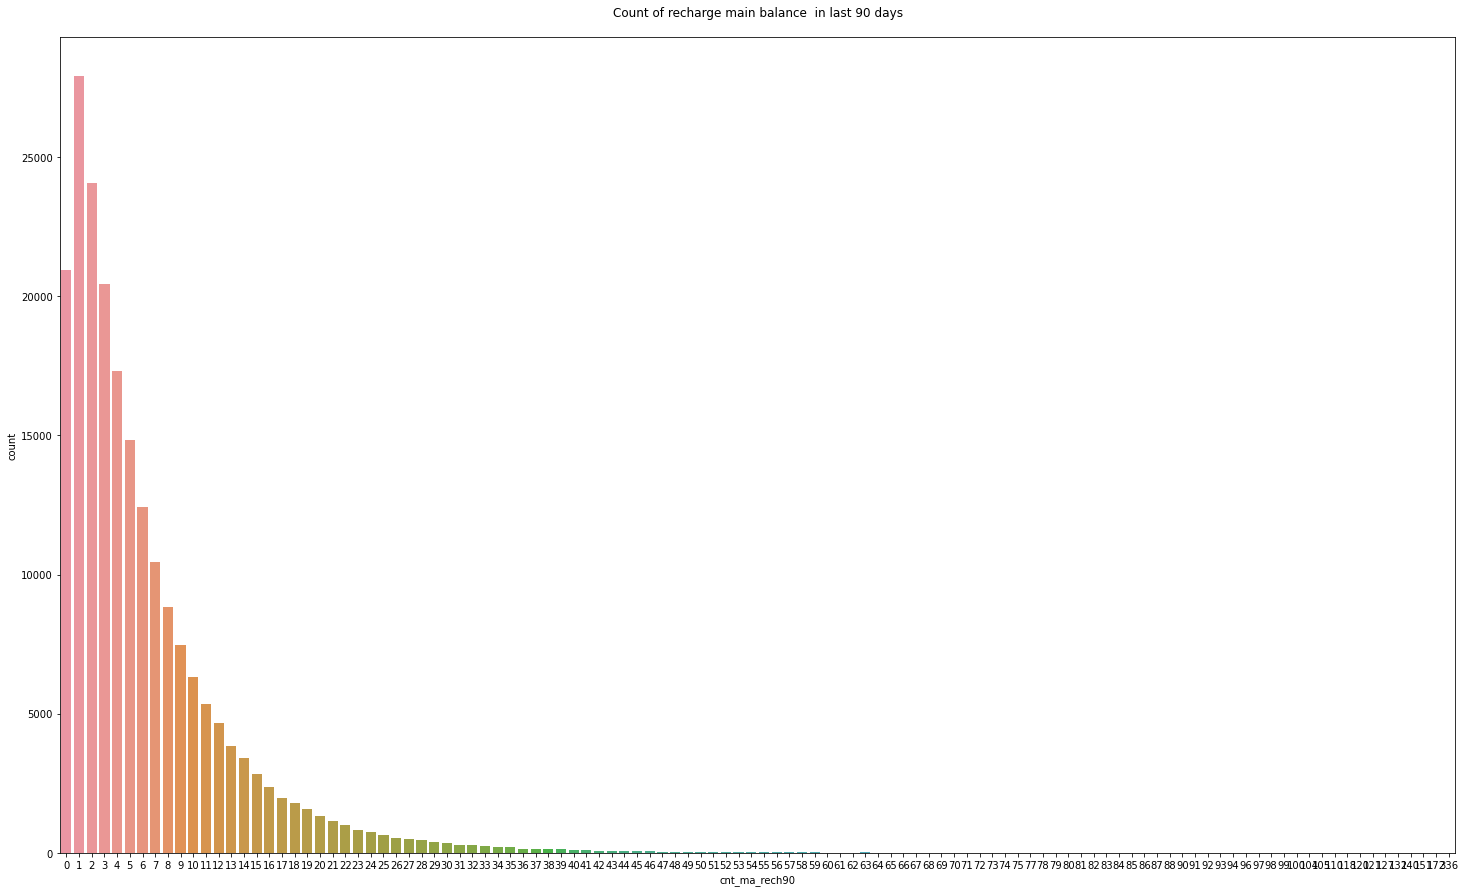

In [17]:
plt.figure(figsize=(25,15))
sns.countplot(df["cnt_ma_rech90"])
plt.title("Count of recharge main balance  in last 90 days\n ")
plt.show() 

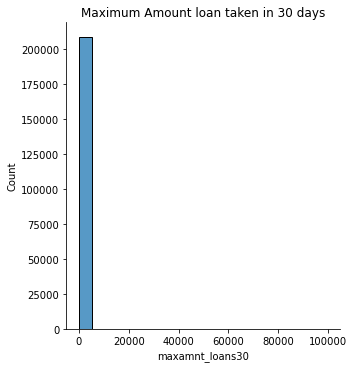

In [18]:
sns.displot(df["maxamnt_loans30"])
plt.title("Maximum Amount loan taken in 30 days")
plt.show()

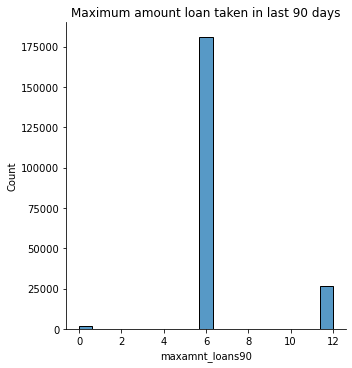

In [19]:
sns.displot(df["maxamnt_loans90"])
plt.title("Maximum amount loan taken in last 90 days")
plt.show()

In [14]:
# checking the target variable for failure and success
df.label.value_counts()

1    183431
0     26162
Name: label, dtype: int64

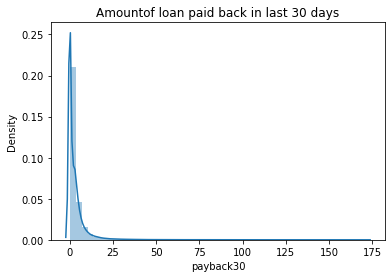

In [21]:
sns.distplot(df["payback30"])
plt.title("Amount of loan paid back in last 30 days")
plt.show()

In [22]:
# bivariate analysis 
#As the target variable has values 0 and 1

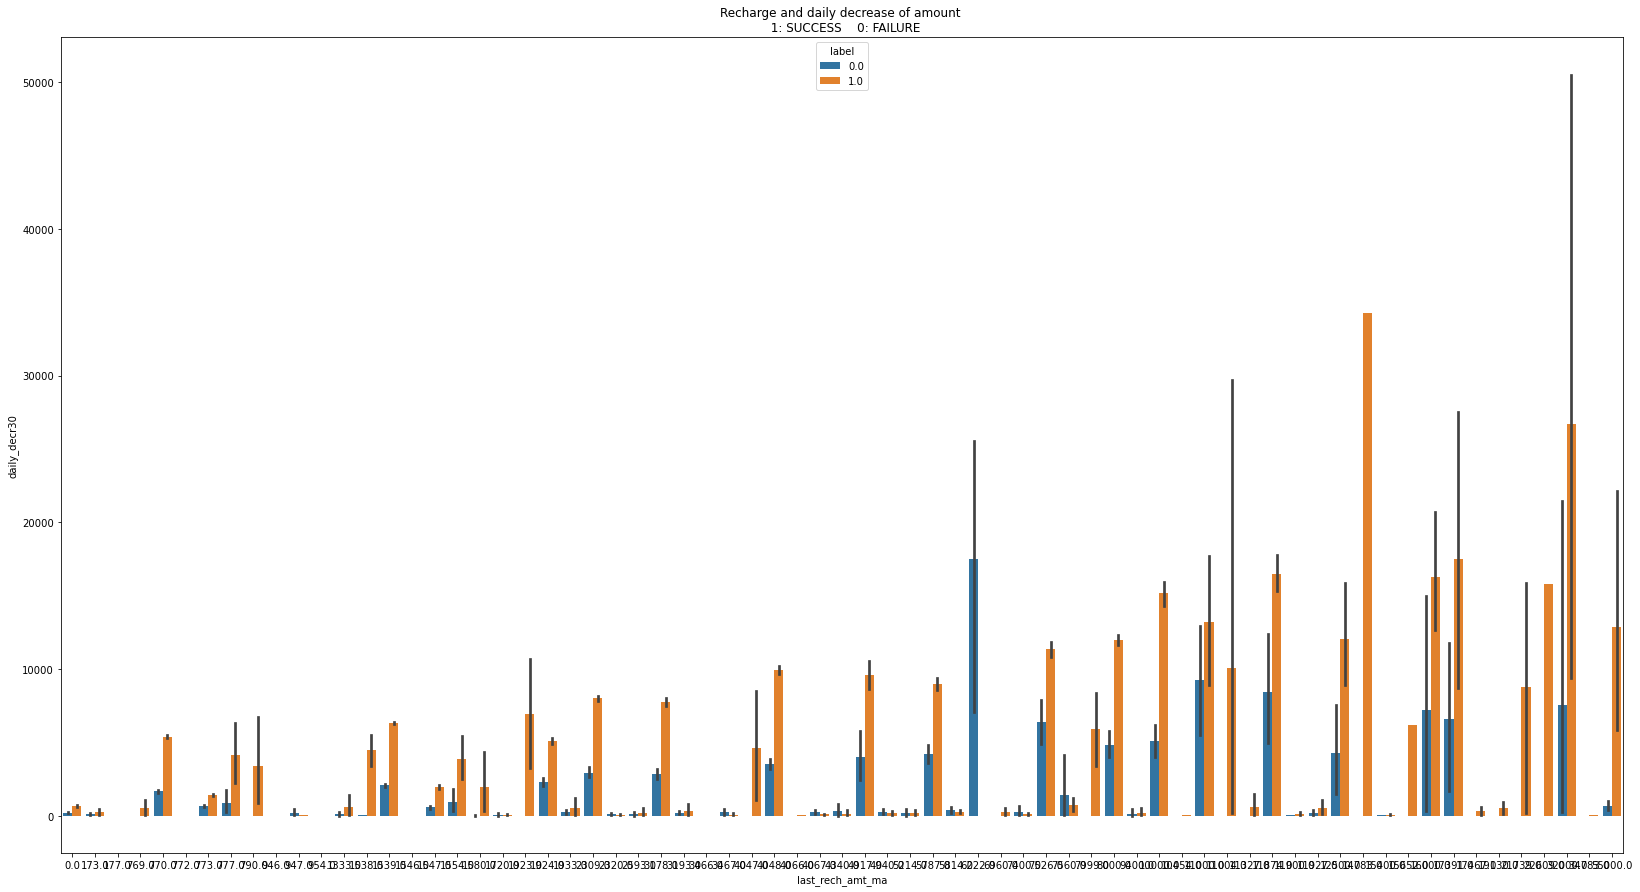

In [31]:
plt.figure(figsize=(2, 13))
sns.barplot(x='last_rech_amt_ma',y='daily_decr30',hue='label',data=df)
plt.title("Recharge and daily decrease of amount \n  1: SUCCESS    0: FAILURE")
plt.show()

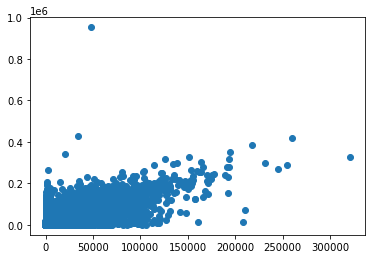

In [24]:
plt.scatter(df["daily_decr90"],df["sumamnt_ma_rech90"]) 

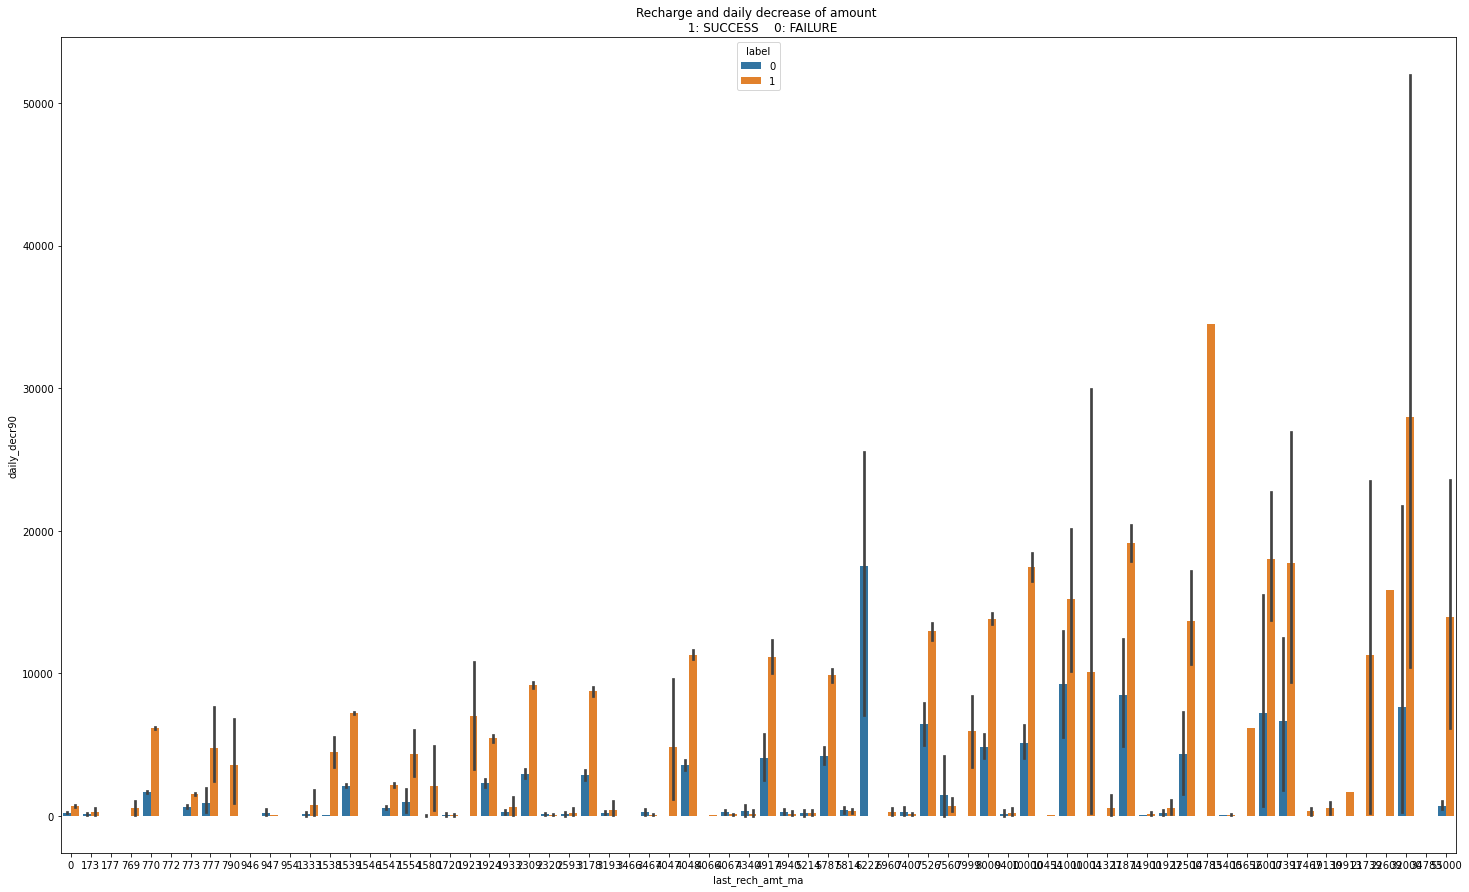

In [25]:
plt.figure(figsize=(25, 15))
sns.barplot(x='last_rech_amt_ma',y='daily_decr90',hue='label',data=df)
plt.title("Recharge and daily decrease of amount \n  1: SUCCESS    0: FAILURE")
plt.show()

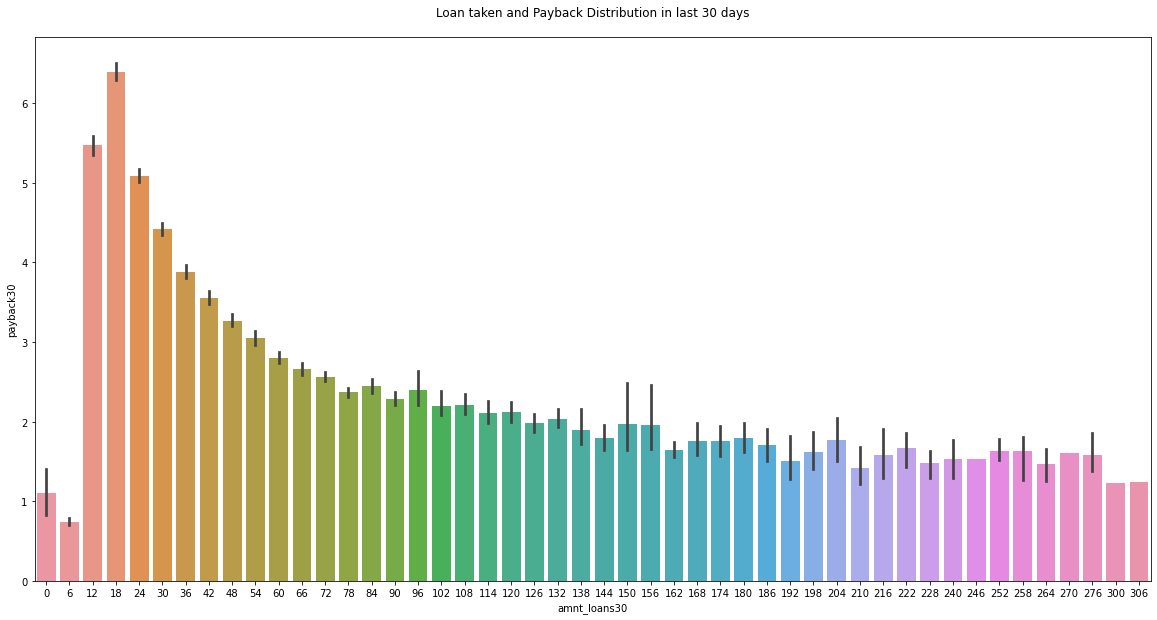

In [26]:
plt.figure(figsize=(20,10))
plt.title('Loan taken and Payback Distribution in last 30 days\n')
sns.barplot(df["amnt_loans30"],df["payback30"])
plt.show() 

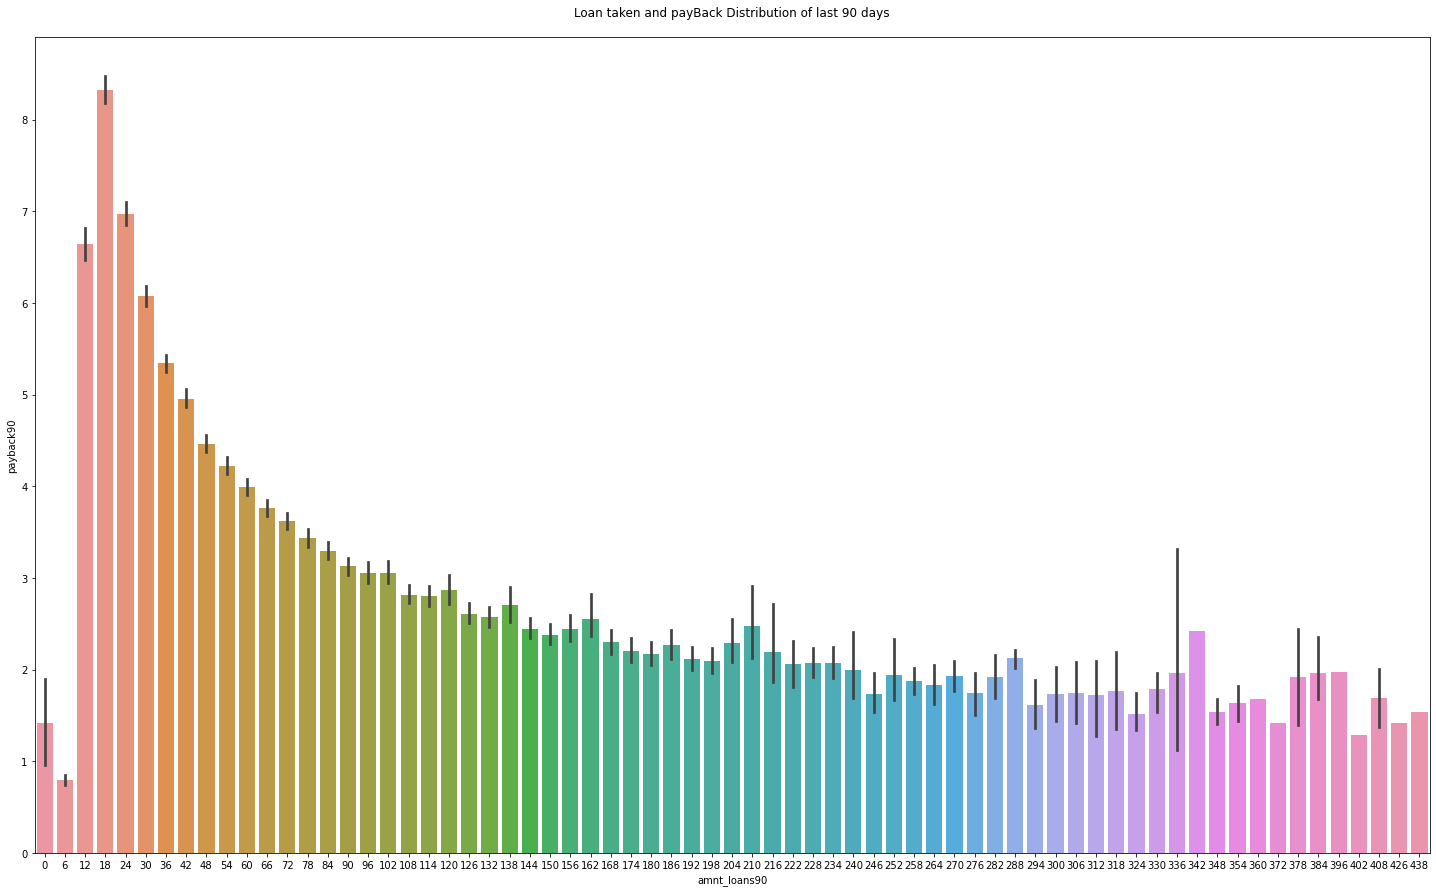

In [27]:
plt.figure(figsize=(25,15))
plt.title('Loan taken and payBack Distribution of last 90 days\n')
sns.barplot(df["amnt_loans90"],df["payback90"])
plt.show() 

# Changing the nominal values  to numerical

In [28]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [29]:
list1=['msisdn','pcircle']
for i in list1:
    df[i]=le.fit_transform(df[i])
df.head(5)

label  msisdn    aon  daily_decr30  daily_decr90  rental30  rental90  \
1      0   40191  272.0   3055.050000   3065.150000    220.13    260.13   
2      1  142291  712.0  12122.000000  12124.750000   3691.26   3691.26   
3      1   33594  535.0   1398.000000   1398.000000    900.13    900.13   
4      1  104157  241.0     21.228000     21.228000    159.42    159.42   
5      1    6910  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  \
1                2.0                0.0              1539  ...   
2               20.0                0.0              5787  ...   
3                3.0                0.0              1539  ...   
4               41.0                0.0               947  ...   
5                4.0                0.0              2309  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
1              6.0                 0.0          2.0            12   
2             12.0                 0.0          1.0            12   
3              6.0                 0.0          1.0             6   
4              6.0                 0.0          2.0            12   
5              6.0                 0.0          7.0            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
1                6                 0.0  29.000000  29.000000        0   
2               12                 0.0   0.000000   0.000000        0   
3                6                 0.0   0.000000   0.000000        0   
4                6                 0.0   0.000000   0.000000        0   
5                6                 0.0   2.333333   2.333333        0   

       pdate  
1 2016-07-20  
2 2016-10-08  
3 2016-08-19  
4 2016-06-06  
5 2016-06-22  

[5 rows x 36 columns]

In [30]:
#dropping  the pcircle variable 
df.drop('pcircle',axis=1,inplace=True)

# Tried model training without dropping these below variables also. It is not affecting the predictions
* dropping the columns which have no significance in predicting the defaulter.

In [31]:
df.drop('pdate',axis=1,inplace=True)
df.drop('rental30',axis=1,inplace=True)
df.drop('rental90',axis=1,inplace=True)
df.drop('fr_ma_rech30',axis=1,inplace=True)
df.drop('fr_ma_rech90',axis=1,inplace=True)
df.drop('pcircle',axis=1,inplace=True)

# plotting the outliers

<AxesSubplot:>

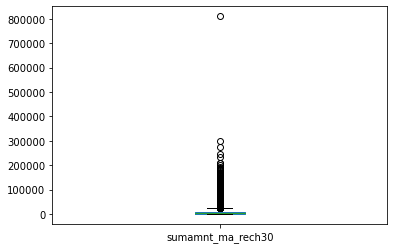

In [32]:
df["sumamnt_ma_rech30"].plot.box()

<AxesSubplot:>

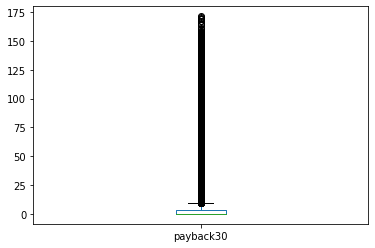

In [33]:
df["payback30"].plot.box()

<AxesSubplot:>

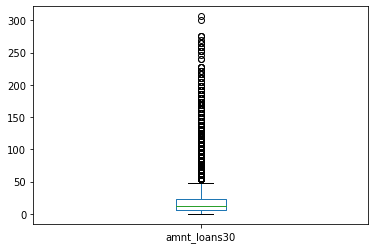

In [34]:
df["amnt_loans30"].plot.box()

<AxesSubplot:>

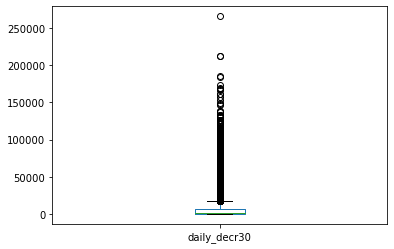

In [35]:
df["daily_decr30"].plot.box()

All the above boxplot shows the outliers are present 

In [36]:
from scipy.stats import zscore

In [37]:
z=np.abs(zscore(df))
z
threshold=3
print(np.where(z>3))

(array([    22,     30,     30, ..., 209586, 209587, 209587]), array([29,  5, 23, ..., 25, 23, 27]))


In [38]:
df_new=df[(z<3).all(axis=1)]

In [39]:
df_new

label  msisdn     aon  daily_decr30  daily_decr90  last_rech_date_ma  \
1           0   40191   272.0   3055.050000   3065.150000                2.0   
2           1  142291   712.0  12122.000000  12124.750000               20.0   
3           1   33594   535.0   1398.000000   1398.000000                3.0   
4           1  104157   241.0     21.228000     21.228000               41.0   
5           1    6910   947.0    150.619333    150.619333                4.0   
...       ...     ...     ...           ...           ...                ...   
209589      1   42866   404.0    151.872333    151.872333                1.0   
209590      1  178248  1075.0     36.936000     36.936000                4.0   
209591      1   53995  1013.0  11843.111670  11904.350000                3.0   
209592      1  111388  1732.0  12488.228330  12574.370000                2.0   
209593      1  121263  1581.0   4489.362000   4534.820000               13.0   

        last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  sumamnt_ma_rech30  \
1                     0.0              1539              2             3078.0   
2                     0.0              5787              1             5787.0   
3                     0.0              1539              1             1539.0   
4                     0.0               947              0                0.0   
5                     0.0              2309              7            20029.0   
...                   ...               ...            ...                ...   
209589                0.0              4048              3            10404.0   
209590                0.0               773              4             3092.0   
209591                0.0              1539              5             9334.0   
209592               38.0               773              5            12154.0   
209593                0.0              7526              2             9065.0   

        ...  cnt_loans30  amnt_loans30  maxamnt_loans30  medianamnt_loans30  \
1       ...            2            12              6.0                 0.0   
2       ...            1            12             12.0                 0.0   
3       ...            1             6              6.0                 0.0   
4       ...            2            12              6.0                 0.0   
5       ...            7            42              6.0                 0.0   
...     ...          ...           ...              ...                 ...   
209589  ...            2            12              6.0                 0.0   
209590  ...            3            18              6.0                 0.0   
209591  ...            4            42             12.0                 0.0   
209592  ...            2            18             12.0                 0.0   
209593  ...            2            18             12.0                 0.0   

        cnt_loans90  amnt_loans90  maxamnt_loans90  medianamnt_loans90  \
1               2.0            12                6                 0.0   
2               1.0            12               12                 0.0   
3               1.0             6                6                 0.0   
4               2.0            12                6                 0.0   
5               7.0            42                6                 0.0   
...             ...           ...              ...                 ...   
209589          2.0            12                6                 0.0   
209590          3.0            18                6                 0.0   
209591          6.0            54               12                 0.0   
209592          3.0            24               12                 0.0   
209593          2.0            18               12                 0.0   

        payback30  payback90  
1       29.000000  29.000000  
2        0.000000   0.000000  
3        0.000000   0.000000  
4        0.000000   0.000000  
5        2.333333   2.333333  
...           ...        ...  
209589   1.000000  

# Removing outliers will be loss of 1/5 of data. So , deciding not to remove them

In [40]:
# dividing the x varaibles features from y variable target (label)
x=df.drop(columns=["label"])
y=df[["label"]]

In [41]:
print(x.shape ,"\t" , y.shape)

(209593, 29) 	 (209593, 1)


# To check the distribution of skewness

In [42]:
df.skew()  # shows  very little skewness

label                   -2.270254
msisdn                   0.000719
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans90          1.678304
medianamnt_loans90       4.895720
payback30                8.310695
payback90     

In [43]:
# removing skewness by transforming data
from sklearn.preprocessing import power_transform

In [44]:
x=power_transform(x,method='yeo-johnson')

# Model Training

Logistic REgression

In [45]:
# scaling the input variable
from sklearn.preprocessing import StandardScaler
mc=StandardScaler()
scaledX=mc.fit_transform(x)

In [46]:
# importing our model libraries
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [47]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [48]:
best_rstate=0
accuracy=0
for i in range(30,200):
    x_train,x_test,y_train,y_test=train_test_split(scaledX,y,test_size=.25,random_state=i,stratify=y)
    mod=LogisticRegression()
    mod.fit(x_train,y_train)
    y_pred=mod.predict(x_test)
    tempaccu=accuracy_score(y_test,y_pred)
    if(tempaccu>accuracy):
        accuracy=tempaccu
        best_rstate=i
        
print("Best Accuracy",accuracy*100, "Random state",best_rstate)        

Best Accuracy 87.7249565831409 Random state 189


In [49]:
# breaking out input and output variable into train and test data
x_train,x_test,y_train,y_test=train_test_split(scaledX,y,test_size=.22,random_state=189,stratify=y)

In [50]:
#using algorithms in for loops
model=[LogisticRegression(),GaussianNB(),DecisionTreeClassifier(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier()]
for m in model:
    m.fit(x_train,y_train)
    y_pred=m.predict(x_test)
    print("Accuracy score of " , m , "is " , accuracy_score(y_test,y_pred))
    print("confusion matrix of " , m , "is \n",confusion_matrix(y_test,y_pred))
    print("classification report of " , m, "is \n",classification_report(y_test,y_pred))
    print("**********************************************************************\n")

Accuracy score of  LogisticRegression() is  0.8770575350783978
confusion matrix of  LogisticRegression() is 
 [[  182  5574]
 [   95 40260]]
classification report of  LogisticRegression() is 
               precision    recall  f1-score   support

           0       0.66      0.03      0.06      5756
           1       0.88      1.00      0.93     40355

    accuracy                           0.88     46111
   macro avg       0.77      0.51      0.50     46111
weighted avg       0.85      0.88      0.83     46111

**********************************************************************

Accuracy score of  GaussianNB() is  0.7251198195658303
confusion matrix of  GaussianNB() is 
 [[ 4455  1301]
 [11374 28981]]
classification report of  GaussianNB() is 
               precision    recall  f1-score   support

           0       0.28      0.77      0.41      5756
           1       0.96      0.72      0.82     40355

    accuracy                           0.73     46111
   macro avg       0.

# hyper parameter tuning

In [51]:
from sklearn.model_selection import GridSearchCV

grid_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'max_features': ['auto', 'sqrt'],
               'n_estimators': [5,10,12,15]}

clf = RandomForestClassifier()
model = GridSearchCV(estimator = clf, param_grid = grid_search, 
                               cv = 4, n_jobs = -1)
model.fit(scaledX,y)
print("best parameters ",model.best_params_)
print("accuracy :",model.best_score_)



best parameters  {'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 8, 'min_samples_split': 5, 'n_estimators': 5}
accuracy : 0.9014661744579615


In [55]:
# RandomForestClassifier with best parameters 
rfc=RandomForestClassifier(criterion="gini",min_samples_leaf= 8, min_samples_split= 5,n_estimators=5, max_depth=2, max_features="auto")
rfc.fit(x_train,y_train)
rfc.score=(x_train,y_train)
predrfc=rfc.predict(x_test)
print("accuracy score",accuracy_score(y_test,predrfc))
print("confusion matrix\n",confusion_matrix(y_test,predrfc))
print("classification report",classification_report(y_test,predrfc))

accuracy score 0.9006961462557741
confusion matrix
 [[ 1386  4370]
 [  209 40146]]
classification report               precision    recall  f1-score   support

           0       0.87      0.24      0.38      5756
           1       0.90      0.99      0.95     40355

    accuracy                           0.90     46111
   macro avg       0.89      0.62      0.66     46111
weighted avg       0.90      0.90      0.88     46111



In [56]:
# cross validating RandomForestClassifier
from sklearn.model_selection import cross_val_score
score=cross_val_score(rfc,scaledX,y,cv=4,scoring='accuracy')
print("Cross Validation Score : ", score,"\n")
print("Mean" , score.mean())
print("Standard Deviation" , score.std())

Cross Validation Score :  [0.90156301 0.90114126 0.9011031  0.89778236] 

Mean 0.9003974313761645
Standard Deviation 0.0015205611504474485


# Conclusion

RandomForestClassifier is performing best among all above with accuaracy score 0.91

In [57]:
from sklearn.metrics import roc_curve,roc_auc_score

In [65]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=5)
modelCV = RandomForestClassifier(class_weight = "balanced")
scoring = 'roc_auc'
results = model_selection.cross_val_score(rfc, x_train, y_train, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

AUC: 0.816 (0.003)


In [66]:
# Create ROC Graph
y_pred_prob= rfc.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob)

In [67]:
print(fpr,"\n",tpr,"\n",thresholds)

[0.         0.0399583  0.0399583  0.04325921 0.05264072 0.15948575
 0.15948575 0.16174427 0.22081306 0.2209868  0.22133426 0.22133426
 0.22133426 0.2248089  0.24878388 0.24878388 0.24895761 0.25521195
 0.25521195 0.25521195 0.25625434 0.28596247 0.28908965 0.28908965
 0.28926338 0.28943711 0.32175122 0.37230716 0.37265462 0.37300208
 0.37300208 0.41296039 0.42981237 0.42981237 0.4305073  0.4305073
 0.61084086 0.61153579 0.61170952 0.61170952 0.75086866 0.75121612
 0.75260598 0.75260598 0.757123   0.757123   0.75799166 0.75799166
 0.75903405 0.75903405 0.75903405 0.75920778 0.75920778 0.75920778
 0.76129256 0.76233495 0.76302988 0.76372481 0.76945796 0.76980542
 0.77293259 0.79308548 0.79656011 1.        ] 
 [0.         0.2902986  0.29238013 0.30216826 0.33765333 0.62453228
 0.62582084 0.62842275 0.69976459 0.70226738 0.70452236 0.70538967
 0.70566225 0.71790361 0.74018089 0.7404287  0.7410482  0.75100979
 0.75110891 0.75123281 0.75760129 0.77417916 0.77697931 0.7794821
 0.77968034 0.77

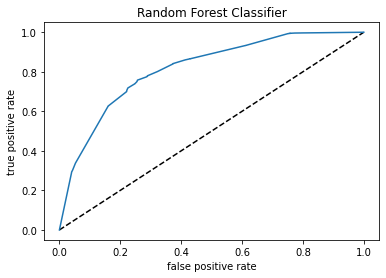

In [69]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest Classifier')
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("Random Forest Classifier")
plt.show()

In [70]:
auc_score=roc_auc_score(y_test,predrfc)

In [71]:
auc_score 

0.6178065903811112

# Saving the model- Serialization

In [72]:
# saving the prediction model

import pickle
filename="MicroCreditFinancing.pkl"
pickle.dump(predrfc,open(filename,'wb'))

In [73]:
predrfc

array([1, 1, 1, ..., 1, 1, 0])

In [74]:
ds_pred=pd.DataFrame(data=y_pred,columns=['label'])
writer = pd.ExcelWriter('MicroCredit.xlsx', engine='xlsxwriter')
ds_pred.to_excel(writer,sheet_name='Sheet1', index=False)
writer.save()